# **Feature Selection in Supervised Learning**

# Use Regression Problem

In [ ]:
# Import Libray
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Genarate dataset using sklearn libray(Suitable regression problem)
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50, n_features=5)

In [ ]:
x

array([[ 7.28537924e-01,  1.25123093e+00,  3.22473131e-01,
        -6.04254565e-02, -2.37185075e-01],
       [ 1.15307052e+00,  3.20165761e-01,  5.22534619e-01,
        -7.06474704e-01,  1.11015533e+00],
       [ 2.29617034e+00, -4.25221384e-01,  3.50813587e-01,
        -4.03923684e-01,  1.77578842e+00],
       [ 3.41885410e-01,  1.22037182e+00,  2.56068783e-01,
        -1.04981870e+00, -1.06984093e+00],
       [-7.56324311e-01,  8.85331362e-01, -2.20207268e-03,
         7.58945235e-02, -2.02253823e-01],
       [-8.39889370e-01,  1.90657472e+00,  1.56210390e+00,
        -3.69105678e-01,  1.12853389e+00],
       [-4.42812681e-01,  1.10526088e-01,  5.46357986e-01,
         8.34546595e-01,  4.60928438e-01],
       [ 4.42703125e-01,  6.79268744e-02,  1.01599842e+00,
         5.15522728e-01, -2.04859634e-02],
       [ 1.89890933e+00, -3.11444405e-01,  1.93805872e+00,
         1.05206129e+00, -1.60939676e+00],
       [-1.76348283e+00,  1.19717965e-01, -2.95023314e+00,
         1.24376111e+00

In [ ]:
# Make Data Frame in X axios
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,0.728538,1.251231,0.322473,-0.060425,-0.237185
1,1.153071,0.320166,0.522535,-0.706475,1.110155
2,2.296170,-0.425221,0.350814,-0.403924,1.775788
3,0.341885,1.220372,0.256069,-1.049819,-1.069841
4,-0.756324,0.885331,-0.002202,0.075895,-0.202254


In [ ]:
# Target y values
y[:5]

array([ 93.8776467 ,  57.97551173, 109.32877994, -43.46535454,
        22.3644241 ])

**Choose Suitable Feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_regression # Calculating the amount of mutual information
from sklearn.feature_selection import SelectKBest # Calculate Selecting the largest number of feature based on size

**Create feture select object**



In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=3) # Choosing the best three features out of five
fs.fit(x,y) # Train and fit values

SelectKBest(k=3, score_func=<function mutual_info_regression at 0x7d53927dac20>)

Get the amount of mutual information (Relationship between Features and Target column)

In [ ]:
fs.scores_

array([0.03553071, 0.11053396, 0.        , 0.2689859 , 0.        ])

In [ ]:
# Convert Series using pandas
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score

,0
0,0.035531
1,0.110534
2,0.000000
3,0.268986
4,0.000000


**Sort and polt**

<Axes: >

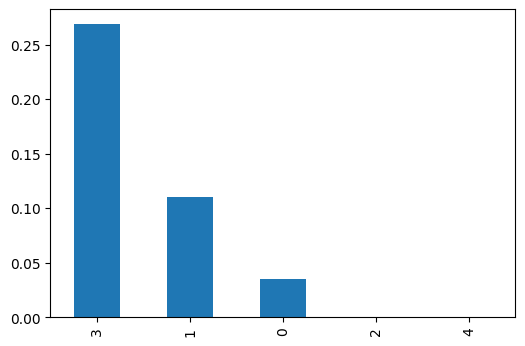

In [ ]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

**Choosing three features**

In [ ]:
x_selected = fs.fit_transform(x, y)
x_selected = pd.DataFrame(x_selected) # Use Data Frame in selected value

**After Dataset (Selected Features)**

In [ ]:
x_selected.head()

,0,1,2
0,0.728538,1.251231,-0.060425
1,1.153071,0.320166,-0.706475
2,2.296170,-0.425221,-0.403924
3,0.341885,1.220372,-1.049819
4,-0.756324,0.885331,0.075895


**Before Dataset**

In [ ]:
x.head()

,0,1,2,3,4
0,0.728538,1.251231,0.322473,-0.060425,-0.237185
1,1.153071,0.320166,0.522535,-0.706475,1.110155
2,2.296170,-0.425221,0.350814,-0.403924,1.775788
3,0.341885,1.220372,0.256069,-1.049819,-1.069841
4,-0.756324,0.885331,-0.002202,0.075895,-0.202254


# Use Classification Problem

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [ ]:
x, y = make_classification(n_samples=50, n_features=5, n_informative=2) # n_samples=50 --> Give 50 data points , n_informative=2 --> wont 2 classes
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,0.532936,-0.340423,1.736523,-0.566157,0.472274
1,0.746748,1.111070,2.172753,-0.346696,0.748766
2,-0.912258,-1.274687,-1.843901,-0.966078,-1.185482
3,0.943838,0.599643,2.550002,-0.101767,1.011940
4,0.500658,0.471832,0.878274,0.759414,0.695269


In [ ]:
y[:5]

array([1, 1, 0, 1, 1])

**Create feture select object**

In [ ]:
# Create feture select object
fs = SelectKBest(score_func=mutual_info_classif, k=2) # Choosing the best two features out of five
fs.fit(x,y) # Train and fit values

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7d53927dad40>)

**Get the amount of mutual information (Relationship between Features and Target column)**

In [ ]:
fs.scores_

array([0.37525249, 0.        , 0.5973517 , 0.40388395, 0.35745488])

In [ ]:
# Convert Series using pandas
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score

,0
0,0.375252
1,0.000000
2,0.597352
3,0.403884
4,0.357455


**Sort and polt**

<Axes: >

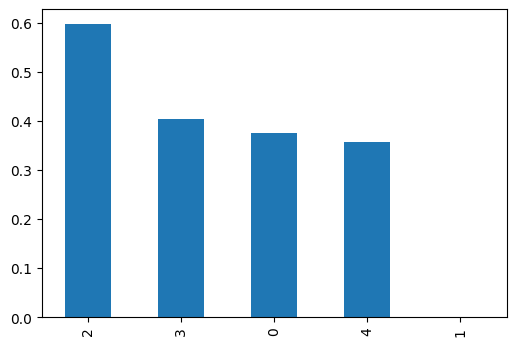

In [ ]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

**Choosing three features**

In [ ]:
x_selected = fs.fit_transform(x, y)
x_selected = pd.DataFrame(x_selected) # Use Data Frame in selected value

**After Dataset (Selected Features)**

In [ ]:
x_selected.head() # Becouse choosing best 2 columns

,0,1
0,1.736523,-0.566157
1,2.172753,-0.346696
2,-1.843901,-0.966078
3,2.550002,-0.101767
4,0.878274,0.759414


**Before Dataset**

In [ ]:
x.head()

,0,1,2,3,4
0,0.532936,-0.340423,1.736523,-0.566157,0.472274
1,0.746748,1.111070,2.172753,-0.346696,0.748766
2,-0.912258,-1.274687,-1.843901,-0.966078,-1.185482
3,0.943838,0.599643,2.550002,-0.101767,1.011940
4,0.500658,0.471832,0.878274,0.759414,0.695269
